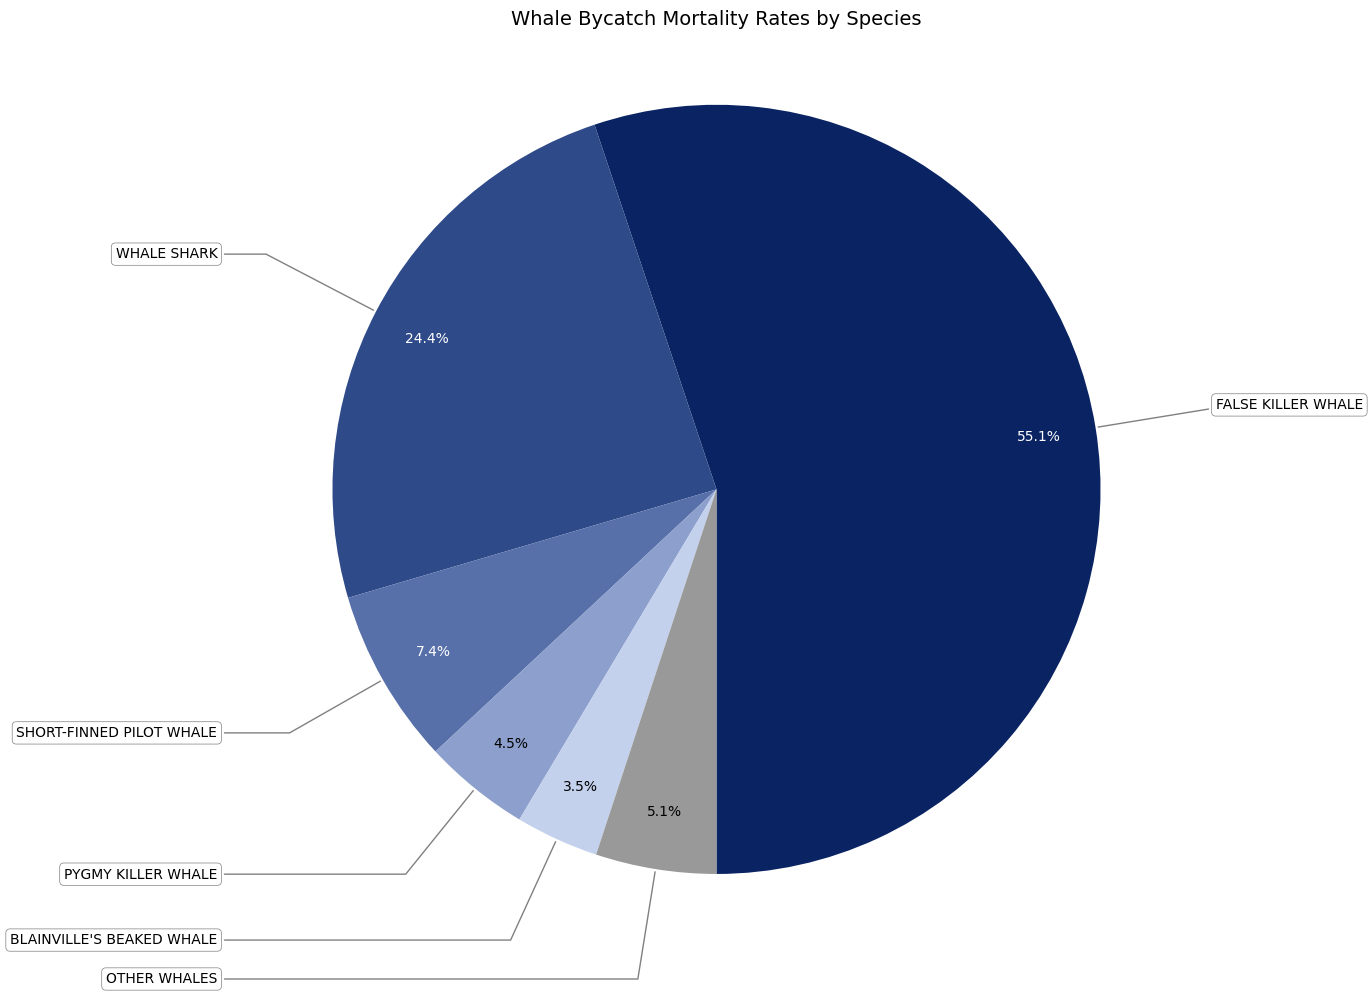

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and process data
df = pd.read_csv('../data/table5_whale-only_bycatch_data.csv')
mortality_by_species = df[df['Observed Mortality rate (per set)'] > 0].groupby('Species (or group)')['Observed Mortality rate (per set)'].sum()
sorted_species = mortality_by_species.sort_values(ascending=False)

# Take top 6 and sum the rest into "Other Whales"
top_5 = sorted_species.head(5)
other_whales = pd.Series({'OTHER WHALES': sorted_species[5:].sum()})
combined_data = pd.concat([top_5, other_whales])

# Custom colors
colors = [
    "#0a2463", "#2E4A88", "#5770A9", "#8D9FCC", "#C3D1EC",  # Top 5
    '#999999'  # "Other Whales"
]

# Create pie chart with rotation and leader lines
plt.figure(figsize=(14, 10))
wedges, texts, autotexts = plt.pie(
    combined_data,
    labels=None,  # Disable default labels (we'll add them manually)
    autopct='%1.1f%%',
    startangle=270,
    colors=colors,
    pctdistance=0.85,
    textprops={'fontsize': 10, 'ha': 'center', 'va': 'center'}
)

for wedge, autotext in zip(wedges, autotexts):
    if wedge.get_facecolor()[0] > 0.5:  # Light-colored wedge
        autotext.set_color('black')
    else:  # Dark-colored wedge
        autotext.set_color('white')

# Add leader lines and custom labels
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5)  # Label box style

for i, (wedge, label) in enumerate(zip(wedges, combined_data.index)):
    # Calculate label angle (midpoint of the wedge)
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))  # Polar to Cartesian
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"

    # Place labels outside the pie with leader lines
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(1.3 * np.sign(x), 1.3 * y),
        horizontalalignment=horizontalalignment,
        bbox=bbox_props,
        arrowprops=dict(
            arrowstyle="-",  # Solid line
            connectionstyle=connectionstyle,
            color="gray"
        )
    )

# Title and formatting
plt.title('Whale Bycatch Mortality Rates by Species', pad=30, fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()